In [1]:
!pip install scanpy
!pip install KDEpy
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


# Summary statistics of datasets

In [2]:
import pandas as pd
import scanpy as sc
import anndata as ad
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse as sps
from scipy.stats import ranksums, spearmanr, kendalltau

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import tools.util_probe as up
import tools.util as ut
import tools.NB_est as nb
import tools.countsplit as cs
import tools.ClusterDE as cd

import importlib

## Read datasets

In [3]:
dataset_paths = [
    "../data/probe_Bac_scRNAseq_Rosenthal/B subtilis minimal media/filtered_data_maxpool_processed.h5ad",
    "../data/probe_Bac_scRNAseq_Rosenthal/B_subilis_DNA-damage-30min/filtered_data_maxpool_processed.h5ad",
    "../data/probe_Bac_scRNAseq_Rosenthal/Sporulation/filtered_data_maxpool_processed.h5ad",
    "../data/probe_Bac_scRNAseq_Rosenthal/MPA_energy_stress/filtered_data_maxpool_processed.h5ad",
    "../data/MOBA_scRNAseq/outs_S3/filtered_data_maxpool_processed.h5ad",
    "../data/MOBA_scRNAseq/outs_S2/filtered_data_maxpool_processed.h5ad",
    "../data/MOBA_scRNAseq/outs_S1/filtered_data_maxpool_processed.h5ad",
    "../data/BacDrop/antibiotics_data_processed_2.h5ad",
    "../data/BacDrop/untreated_data_processed.h5ad",
    "../data/BacDrop/klebsiella_BIDMC35_data_processed_2.h5ad",
    "../data/BacDrop/klebsiella_4species_data_processed.h5ad",
    "../data/BacDrop/ecoli_data_processed.h5ad",
    "../data/BacDrop/pseudomonas_data_processed.h5ad",
    "../data/BacDrop/enterococcus_data_processed.h5ad",

]

dataset_names = [
    "B.sub_minimal_media",
    "B.sub_dna_damage",
    "PAO1_sporulation",
    "PAO1_MPA",
    "PAO1_S3",
    "PAO1_S2",
    "Ecoli_S1",
    "Klebs_anitbiotics",
    "Klebs_untreated",
    "Klebs_BIDMC35",
    "Klebs_4species",
    "Ecoli_4species",
    "Pseudomonas_4species",
    "Enterococcus_4species"

]

In [4]:
datasets = [sc.read_h5ad(p) for p in dataset_paths]

In [5]:
datasets[0].obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,outlier,n_genes,total_counts_norm,total_counts_scale,embedding_reliability,reliability_score,null_reliability_score,leiden_opt
AAACCTGAGCTTATCG-1,130,4.875197,158.0,5.068904,False,130,-7352.870033,-160.522784,undefined,0.358584,0.290483,0
AAACCTGAGGATGCGT-1,310,5.739793,437.0,6.082219,False,310,-7303.488440,38.500145,undefined,0.311571,0.255302,2
AAACCTGAGGATGGAA-1,324,5.783825,571.0,6.349139,False,324,-7284.778020,6.492276,undefined,0.255848,0.418830,3
AAACCTGCAAATTGCC-1,164,5.105945,184.0,5.220356,False,164,-7299.932698,-58.318296,trustworthy,0.658938,0.211471,0
AAACCTGCAATGAAAC-1,382,5.948035,646.0,6.472346,False,382,-7300.348497,24.335851,undefined,0.254839,0.168565,3
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCACAACGCC-1,406,6.008813,613.0,6.419995,False,406,-7257.179693,124.041276,undefined,0.448632,0.134764,2
TTTGGTTTCTACTCAT-1,161,5.087596,181.0,5.204007,False,161,-7384.644273,-160.050081,undefined,0.129607,0.357113,0
TTTGTCAAGACAAAGG-1,161,5.087596,198.0,5.293305,False,161,-7308.719645,-82.180647,trustworthy,0.603677,0.294974,0
TTTGTCACAAGCCATT-1,142,4.962845,163.0,5.099866,False,142,-7311.034456,-105.832331,trustworthy,0.766794,0.344577,0


In [6]:
summary_stats = {
    "n_cells": [data.X.shape[0] for data in datasets],
    "n_genes": [data.X.shape[1] for data in datasets],
    "min_seq_depth": [np.min(data.obs["total_counts"]) for data in datasets],
    "median_seq_depth": [np.median(data.obs["total_counts"]) for data in datasets],
    "zero_counts": [((np.prod(data.X.shape) - data.layers["counts"].getnnz()) / np.prod(data.X.shape)).round(3) for data in datasets],
    "count_85%": [np.percentile(data.layers["counts"].toarray(), 85) for data in datasets],
    "count_95%": [np.percentile(data.layers["counts"].toarray(), 95) for data in datasets],
    "count_99%": [np.percentile(data.layers["counts"].toarray(), 99) for data in datasets],
    "count_max": [np.max(data.layers["counts"].toarray()) for data in datasets],

}


In [7]:
summary_df = pd.DataFrame(summary_stats, index=dataset_names)
summary_df

,n_cells,n_genes,min_seq_depth,median_seq_depth,zero_counts,count_85%,count_95%,count_99%,count_max
B.sub_minimal_media,2784,2952,141.0,325.0,0.911,0.0,1.0,2.0,45.0
B.sub_dna_damage,13801,2959,268.0,555.0,0.861,0.0,1.0,3.0,110.0
PAO1_sporulation,1910,2922,54.0,103.0,0.970,0.0,0.0,2.0,18.0
PAO1_MPA,6703,2937,136.0,267.0,0.940,0.0,1.0,2.0,105.0
PAO1_S3,1544,5553,413.0,794.5,0.862,0.0,1.0,3.0,136.0
PAO1_S2,1255,5540,360.0,647.0,0.881,0.0,1.0,2.0,80.0
Ecoli_S1,3386,3968,103.0,163.0,0.963,0.0,0.0,1.0,14.0
Klebs_anitbiotics,19638,2500,14.0,21.0,0.992,0.0,0.0,0.0,13.0
Klebs_untreated,48511,2500,12.0,21.0,0.991,0.0,0.0,0.0,30.0
Klebs_BIDMC35,9168,2500,15.0,45.0,0.990,0.0,0.0,0.0,26.0


In [8]:
summary_df["protocol"] = [
    "ProBac",        
    "ProBac",
    "ProBac",
    "ProBac",
    "ProBac",
    "ProBac",
    "ProBac",
    "BacDrop",
    "BacDrop",
    "BacDrop",
    "BacDrop",
    "BacDrop",
    "BacDrop",
    "BacDrop",

]

<Axes: xlabel='protocol', ylabel='zero_counts'>

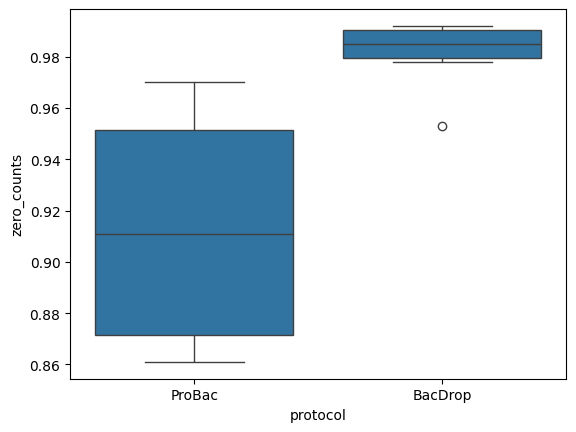

In [9]:
sns.boxplot(summary_df, x="protocol", y="zero_counts")

[None]

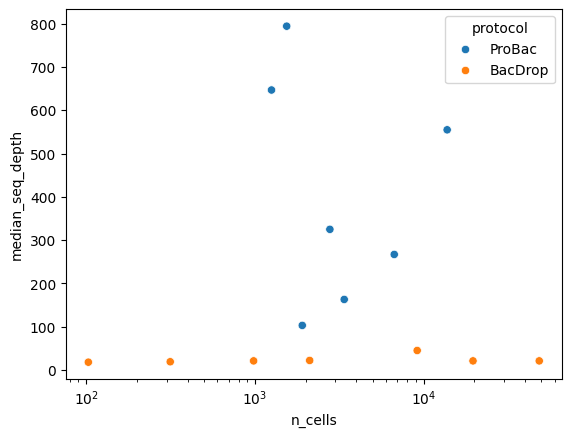

In [10]:
g = sns.scatterplot(summary_df, x="n_cells", y="median_seq_depth", hue="protocol")
g.set(xscale="log")

[None]

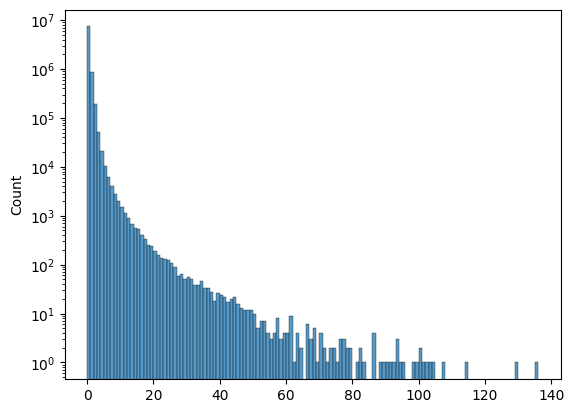

In [11]:
g = sns.histplot(datasets[4].layers["counts"].toarray().flatten(), binwidth=1)
g.set(yscale="log")